In [13]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [3]:
from google.colab import files 
myfile = files.upload()

Saving ppl_2021_new.csv to ppl_2021_new (1).csv


In [4]:
import io
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.rc('axes', unicode_minus = False)
plt.rc('font', family='NanumGothic')

ppl2021 = pd.read_csv(io.BytesIO(myfile['ppl_2021_new.csv']), encoding = 'cp949')
ppl2021

,atdrc_code_se,tot_popltn_co,월
0,종로구,147296,2021-03-15
1,중구,124552,2021-03-15
2,용산구,229013,2021-03-15
3,성동구,291906,2021-03-15
4,광진구,343392,2021-03-15
...,...,...,...
170,관악구,488525,2021-07-15
171,서초구,418294,2021-07-15
172,강남구,530529,2021-07-15
173,송파구,658093,2021-07-15


In [14]:
from pystan import StanModel
from fbprophet import Prophet

##은평구

In [6]:
Eunpyeong = ppl2021[ppl2021['atdrc_code_se'].str.contains('은평구')]
Eunpyeong = Eunpyeong.sort_values('월')
Eunpyeong = Eunpyeong.reset_index(drop=True)
Eunpyeong = Eunpyeong.drop(columns = 'atdrc_code_se',axis=1)
Eunpyeong = Eunpyeong.rename(columns={'tot_popltn_co': 'y','월':'ds'})
Eunpyeong = Eunpyeong[['ds','y']]
Eunpyeong

,ds,y
0,2021-01-15,479223
1,2021-02-15,478336
2,2021-03-15,475501
3,2021-04-15,474843
4,2021-05-15,475143
5,2021-06-15,475371
6,2021-07-15,475008


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.


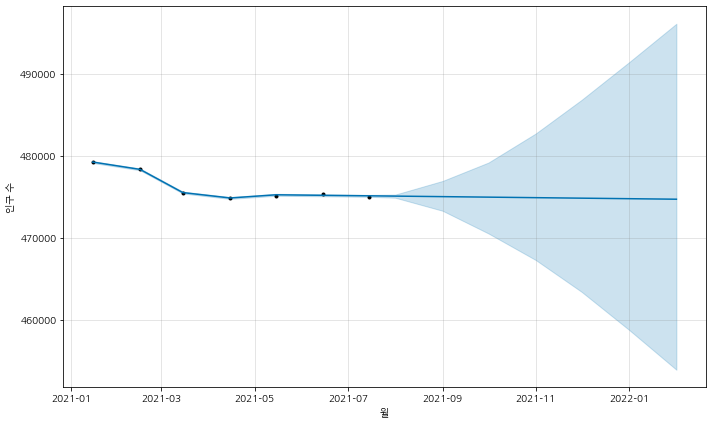

In [22]:
m = Prophet()
m.fit(Eunpyeong)

future_data = m.make_future_dataframe(periods=7,freq='MS')

forecast_data = m.predict(future_data)
fig1 = m.plot(forecast_data,xlabel='월',ylabel='인구 수')

##마포구

In [7]:
Mapo = ppl2021[ppl2021['atdrc_code_se'].str.contains('마포구')]
Mapo = Mapo.sort_values('월')
Mapo = Mapo.reset_index(drop=True)
Mapo = Mapo.drop(columns = 'atdrc_code_se',axis=1)
Mapo = Mapo.rename(columns={'tot_popltn_co': 'y','월':'ds'})
Mapo = Mapo[['ds','y']]
Mapo


,ds,y
0,2021-01-15,371492
1,2021-02-15,371200
2,2021-03-15,368518
3,2021-04-15,369577
4,2021-05-15,369970
5,2021-06-15,370132
6,2021-07-15,370185


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.


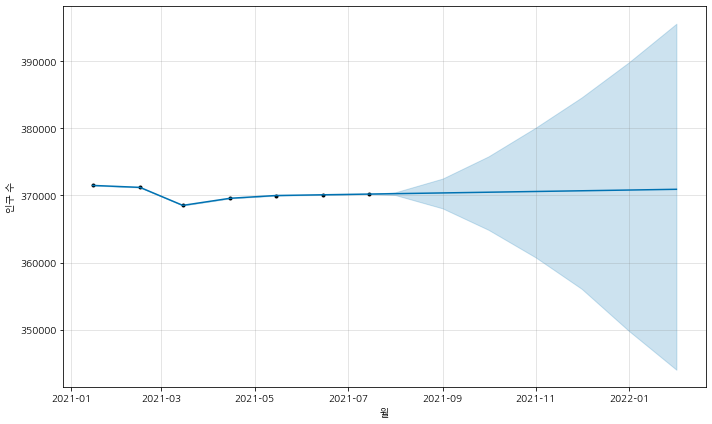

In [21]:
m = Prophet()
m.fit(Mapo)

future_data = m.make_future_dataframe(periods=7,freq='MS')

forecast_data = m.predict(future_data)
fig1 = m.plot(forecast_data,xlabel='월',ylabel='인구 수')

##서대문구

In [8]:
 Seodaemun = ppl2021[ppl2021['atdrc_code_se'].str.contains('서대문구')]
 Seodaemun =  Seodaemun.sort_values('월')
 Seodaemun =  Seodaemun.reset_index(drop=True)
 Seodaemun =  Seodaemun.drop(columns = 'atdrc_code_se',axis=1)
 Seodaemun =  Seodaemun.rename(columns={'tot_popltn_co': 'y','월':'ds'})
 Seodaemun =  Seodaemun[['ds','y']]
 Seodaemun

,ds,y
0,2021-01-15,311720
1,2021-02-15,311132
2,2021-03-15,308482
3,2021-04-15,307825
4,2021-05-15,307406
5,2021-06-15,307070
6,2021-07-15,306839


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.


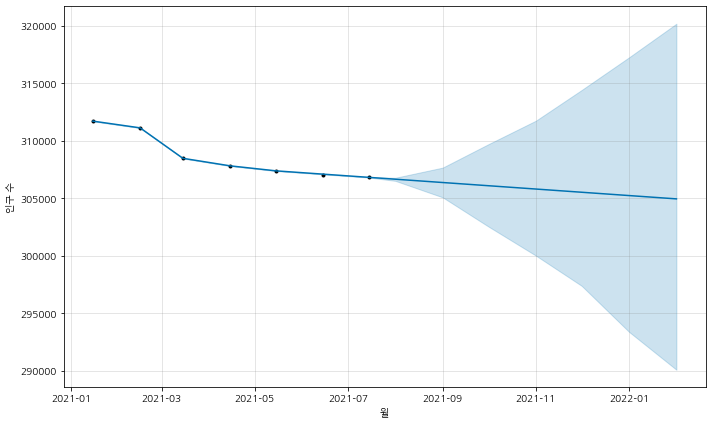

In [20]:
m = Prophet()
m.fit(Seodaemun)

future_data = m.make_future_dataframe(periods=7,freq='MS')

forecast_data = m.predict(future_data)
fig1 = m.plot(forecast_data,xlabel='월',ylabel='인구 수')

## 종로구

In [9]:
 Jongno = ppl2021[ppl2021['atdrc_code_se'].str.contains('종로구')]
 Jongno =  Jongno.sort_values('월')
 Jongno =  Jongno.reset_index(drop=True)
 Jongno =  Jongno.drop(columns = 'atdrc_code_se',axis=1)
 Jongno =  Jongno.rename(columns={'tot_popltn_co': 'y','월':'ds'})
 Jongno =  Jongno[['ds','y']]
 Jongno


,ds,y
0,2021-01-15,149125
1,2021-02-15,148884
2,2021-03-15,147296
3,2021-04-15,147113
4,2021-05-15,146377
5,2021-06-15,146029
6,2021-07-15,145692


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.


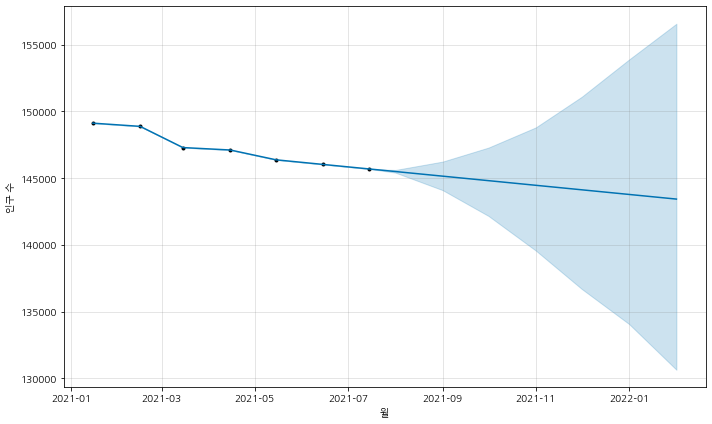

In [18]:
m = Prophet()
m.fit(Jongno)

future_data = m.make_future_dataframe(periods=7,freq='MS')

forecast_data = m.predict(future_data)
fig1 = m.plot(forecast_data,xlabel='월',ylabel='인구 수')

## 중구

In [10]:
 Jung = ppl2021[ppl2021['atdrc_code_se'].str.contains('중구')]
 Jung =  Jung.sort_values('월')
 Jung =  Jung.reset_index(drop=True)
 Jung =  Jung.drop(columns = 'atdrc_code_se',axis=1)
 Jung =  Jung.rename(columns={'tot_popltn_co': 'y','월':'ds'})
 Jung =  Jung[['ds','y']]
 Jung


,ds,y
0,2021-01-15,125038
1,2021-02-15,124836
2,2021-03-15,124552
3,2021-04-15,124477
4,2021-05-15,123133
5,2021-06-15,123016
6,2021-07-15,122951


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.


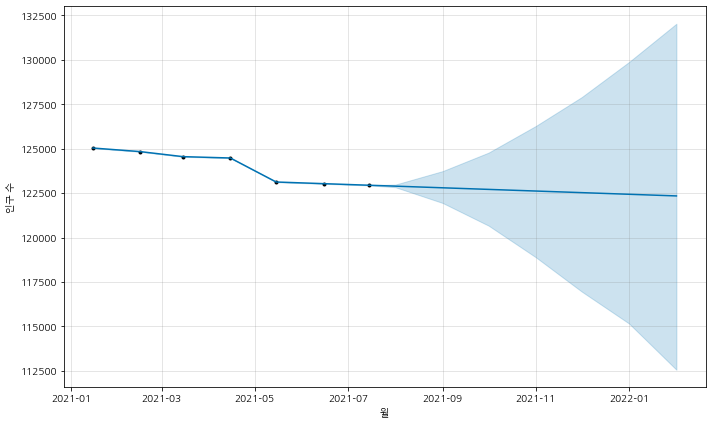

In [17]:
m = Prophet()
m.fit(Jung)

future_data = m.make_future_dataframe(periods=7,freq='MS')

forecast_data = m.predict(future_data)
fig1 = m.plot(forecast_data,xlabel='월',ylabel='인구 수')

## 용산구

In [11]:
 Yongsan = ppl2021[ppl2021['atdrc_code_se'].str.contains('용산구')]
 Yongsan =  Yongsan.sort_values('월')
 Yongsan =  Yongsan.reset_index(drop=True)
 Yongsan =  Yongsan.drop(columns = 'atdrc_code_se',axis=1)
 Yongsan =  Yongsan.rename(columns={'tot_popltn_co': 'y','월':'ds'})
 Yongsan =  Yongsan[['ds','y']]
 Yongsan


,ds,y
0,2021-01-15,230045
1,2021-02-15,230113
2,2021-03-15,229013
3,2021-04-15,228755
4,2021-05-15,227515
5,2021-06-15,226378
6,2021-07-15,225977


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.


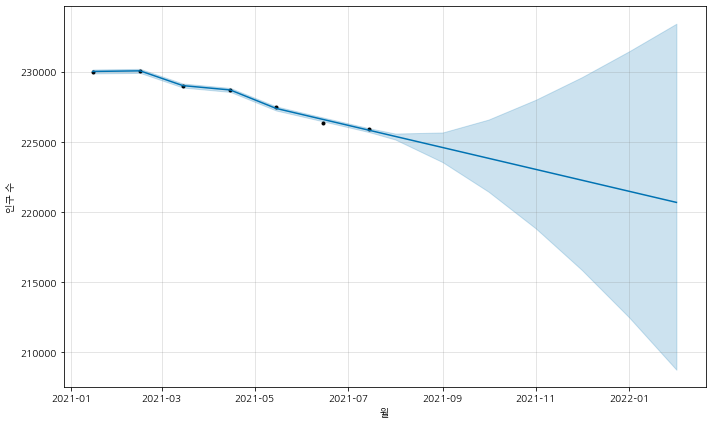

In [16]:
m = Prophet()
m.fit(Yongsan)

future_data = m.make_future_dataframe(periods=7,freq='MS')

forecast_data = m.predict(future_data)
fig1 = m.plot(forecast_data,xlabel='월',ylabel='인구 수')

## 성동구

In [12]:
 Seongdong = ppl2021[ppl2021['atdrc_code_se'].str.contains('성동구')]
 Seongdong =  Seongdong.sort_values('월')
 Seongdong =  Seongdong.reset_index(drop=True)
 Seongdong =  Seongdong.drop(columns = 'atdrc_code_se',axis=1)
 Seongdong =  Seongdong.rename(columns={'tot_popltn_co': 'y','월':'ds'})
 Seongdong =  Seongdong[['ds','y']]
 Seongdong


,ds,y
0,2021-01-15,293103
1,2021-02-15,292537
2,2021-03-15,291906
3,2021-04-15,291534
4,2021-05-15,289656
5,2021-06-15,289162
6,2021-07-15,288703


INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.


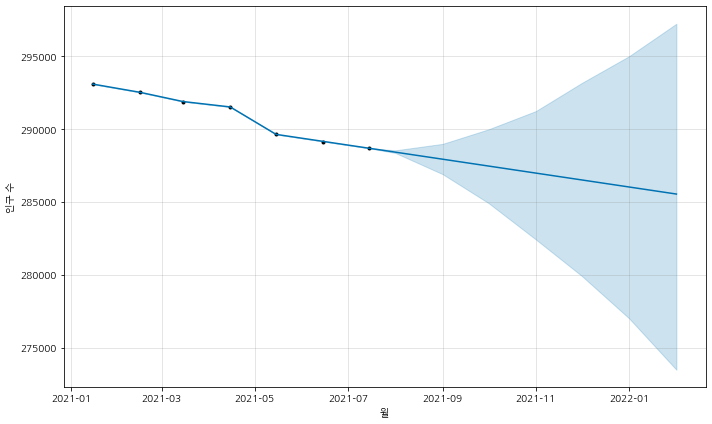

In [15]:
m = Prophet()
m.fit(Seongdong)

future_data = m.make_future_dataframe(periods=7,freq='MS')

forecast_data = m.predict(future_data)
fig1 = m.plot(forecast_data,xlabel='월',ylabel='인구 수')

## 광진구

In [23]:
 Gwangjin = ppl2021[ppl2021['atdrc_code_se'].str.contains('광진구')]
 Gwangjin =  Gwangjin.sort_values('월')
 Gwangjin =  Gwangjin.reset_index(drop=True)
 Gwangjin =  Gwangjin.drop(columns = 'atdrc_code_se',axis=1)
 Gwangjin =  Gwangjin.rename(columns={'tot_popltn_co': 'y','월':'ds'})
 Gwangjin =  Gwangjin[['ds','y']]
 Gwangjin


,ds,y
0,2021-01-15,346067
1,2021-02-15,345248
2,2021-03-15,343392
3,2021-04-15,343006
4,2021-05-15,342812
5,2021-06-15,342481
6,2021-07-15,342111


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.


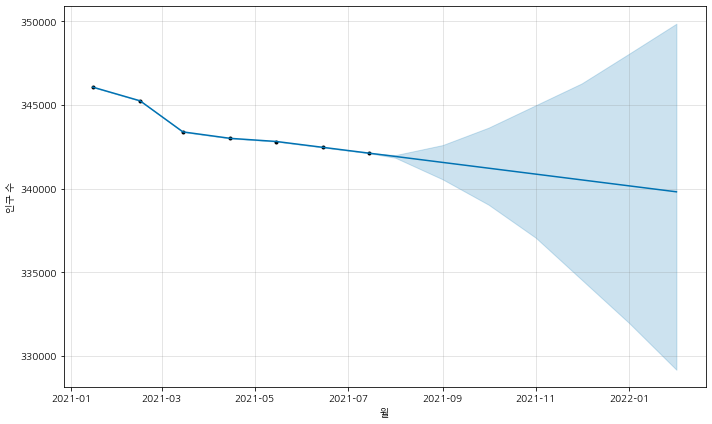

In [24]:
m = Prophet()
m.fit(Gwangjin)

future_data = m.make_future_dataframe(periods=7,freq='MS')

forecast_data = m.predict(future_data)
fig1 = m.plot(forecast_data,xlabel='월',ylabel='인구 수')

## 동대문구

In [25]:
 Dongdaemun = ppl2021[ppl2021['atdrc_code_se'].str.contains('동대문구')]
 Dongdaemun =  Dongdaemun.sort_values('월')
 Dongdaemun =  Dongdaemun.reset_index(drop=True)
 Dongdaemun =  Dongdaemun.drop(columns = 'atdrc_code_se',axis=1)
 Dongdaemun =  Dongdaemun.rename(columns={'tot_popltn_co': 'y','월':'ds'})
 Dongdaemun =  Dongdaemun[['ds','y']]
 Dongdaemun


,ds,y
0,2021-01-15,342034
1,2021-02-15,341756
2,2021-03-15,338875
3,2021-04-15,338480
4,2021-05-15,338233
5,2021-06-15,338040
6,2021-07-15,337946


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.


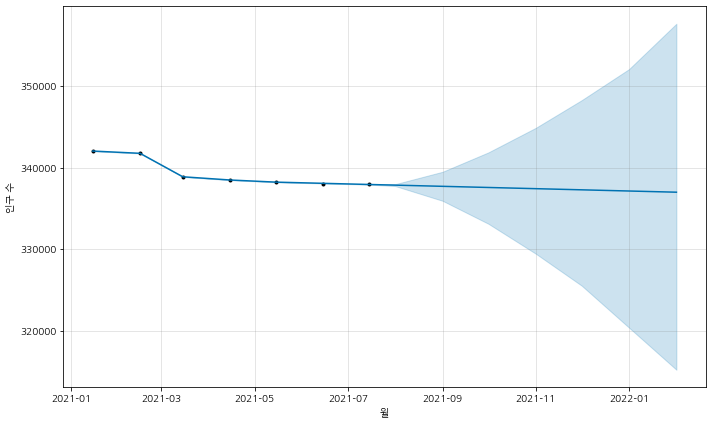

In [26]:
m = Prophet()
m.fit(Dongdaemun)

future_data = m.make_future_dataframe(periods=7,freq='MS')

forecast_data = m.predict(future_data)
fig1 = m.plot(forecast_data,xlabel='월',ylabel='인구 수')

## 중랑구

In [27]:
 Jungnang = ppl2021[ppl2021['atdrc_code_se'].str.contains('중랑구')]
 Jungnang =  Jungnang.sort_values('월')
 Jungnang =  Jungnang.reset_index(drop=True)
 Jungnang =  Jungnang.drop(columns = 'atdrc_code_se',axis=1)
 Jungnang =  Jungnang.rename(columns={'tot_popltn_co': 'y','월':'ds'})
 Jungnang =  Jungnang[['ds','y']]
 Jungnang


,ds,y
0,2021-01-15,394532
1,2021-02-15,393933
2,2021-03-15,392041
3,2021-04-15,391502
4,2021-05-15,390476
5,2021-06-15,389972
6,2021-07-15,389428


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.


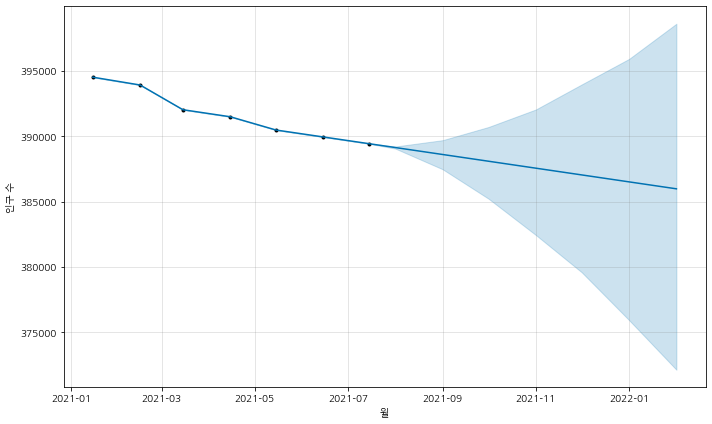

In [28]:
m = Prophet()
m.fit(Jungnang)

future_data = m.make_future_dataframe(periods=7,freq='MS')

forecast_data = m.predict(future_data)
fig1 = m.plot(forecast_data,xlabel='월',ylabel='인구 수')

## 성북구

In [29]:
 Seongbuk = ppl2021[ppl2021['atdrc_code_se'].str.contains('성북구')]
 Seongbuk =  Seongbuk.sort_values('월')
 Seongbuk =  Seongbuk.reset_index(drop=True)
 Seongbuk =  Seongbuk.drop(columns = 'atdrc_code_se',axis=1)
 Seongbuk =  Seongbuk.rename(columns={'tot_popltn_co': 'y','월':'ds'})
 Seongbuk =  Seongbuk[['ds','y']]
 Seongbuk


,ds,y
0,2021-01-15,437684
1,2021-02-15,437961
2,2021-03-15,434826
3,2021-04-15,434383
4,2021-05-15,433988
5,2021-06-15,433658
6,2021-07-15,433361


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.


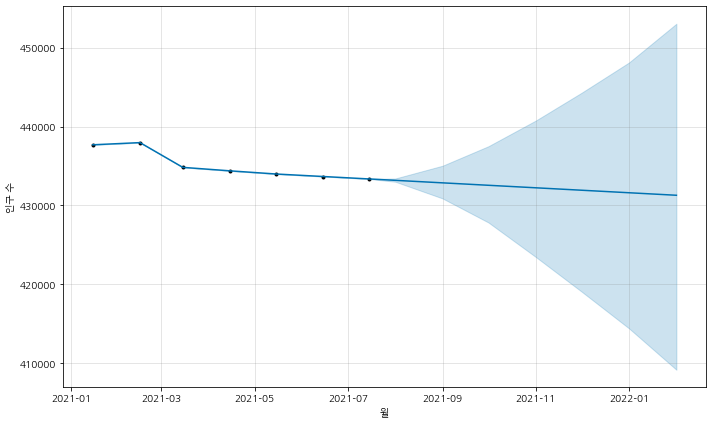

In [30]:
m = Prophet()
m.fit(Seongbuk)

future_data = m.make_future_dataframe(periods=7,freq='MS')

forecast_data = m.predict(future_data)
fig1 = m.plot(forecast_data,xlabel='월',ylabel='인구 수')

## 강북구

In [31]:
 Gangbuk = ppl2021[ppl2021['atdrc_code_se'].str.contains('강북구')]
 Gangbuk =  Gangbuk.sort_values('월')
 Gangbuk =  Gangbuk.reset_index(drop=True)
 Gangbuk =  Gangbuk.drop(columns = 'atdrc_code_se',axis=1)
 Gangbuk =  Gangbuk.rename(columns={'tot_popltn_co': 'y','월':'ds'})
 Gangbuk =  Gangbuk[['ds','y']]
 Gangbuk


,ds,y
0,2021-01-15,307487
1,2021-02-15,306639
2,2021-03-15,304078
3,2021-04-15,303622
4,2021-05-15,303154
5,2021-06-15,302645
6,2021-07-15,302113


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.


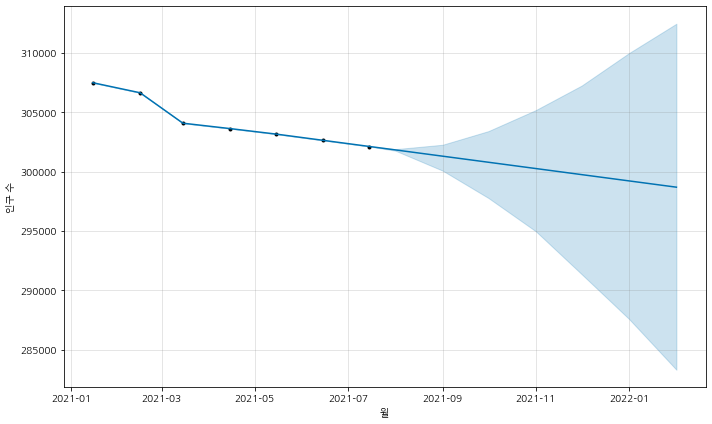

In [32]:
m = Prophet()
m.fit(Gangbuk)

future_data = m.make_future_dataframe(periods=7,freq='MS')

forecast_data = m.predict(future_data)
fig1 = m.plot(forecast_data,xlabel='월',ylabel='인구 수')

## 도봉구

In [35]:
 Dobong = ppl2021[ppl2021['atdrc_code_se'].str.contains('도봉구')]
 Dobong =  Dobong.sort_values('월')
 Dobong =  Dobong.reset_index(drop=True)
 Dobong =  Dobong.drop(columns = 'atdrc_code_se',axis=1)
 Dobong =  Dobong.rename(columns={'tot_popltn_co': 'y','월':'ds'})
 Dobong =  Dobong[['ds','y']]
 Dobong


,ds,y
0,2021-01-15,324281
1,2021-02-15,323431
2,2021-03-15,321717
3,2021-04-15,321227
4,2021-05-15,320687
5,2021-06-15,320365
6,2021-07-15,319893


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.


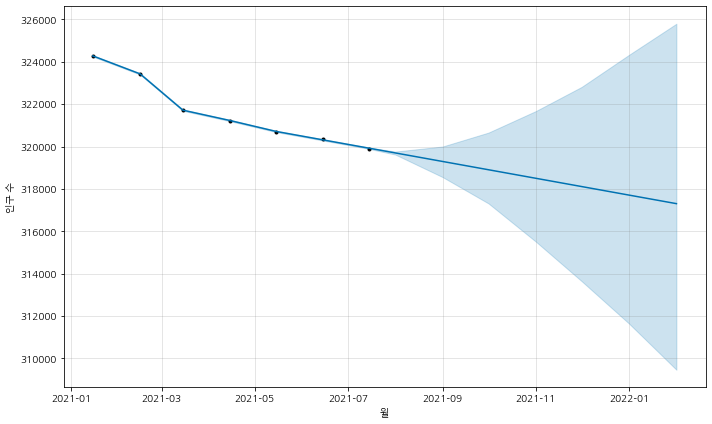

In [36]:
m = Prophet()
m.fit(Dobong)

future_data = m.make_future_dataframe(periods=7,freq='MS')

forecast_data = m.predict(future_data)
fig1 = m.plot(forecast_data,xlabel='월',ylabel='인구 수')

## 노원구

In [37]:
 Nowon = ppl2021[ppl2021['atdrc_code_se'].str.contains('노원구')]
 Nowon =  Nowon.sort_values('월')
 Nowon =  Nowon.reset_index(drop=True)
 Nowon =  Nowon.drop(columns = 'atdrc_code_se',axis=1)
 Nowon =  Nowon.rename(columns={'tot_popltn_co': 'y','월':'ds'})
 Nowon =  Nowon[['ds','y']]
 Nowon


,ds,y
0,2021-01-15,521852
1,2021-02-15,520366
2,2021-03-15,518278
3,2021-04-15,517417
4,2021-05-15,516552
5,2021-06-15,515997
6,2021-07-15,515198


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.


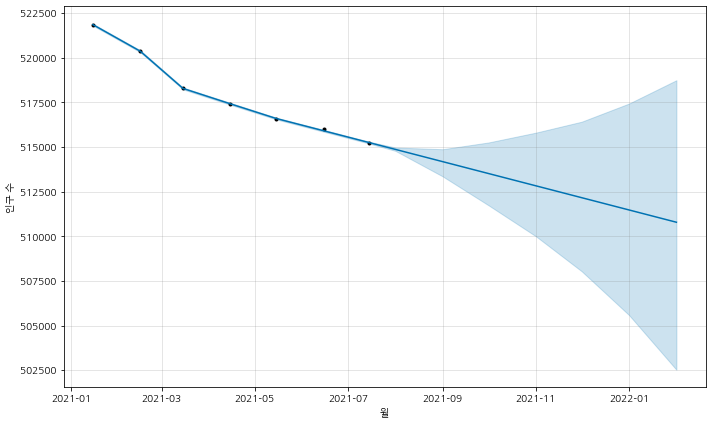

In [38]:
m = Prophet()
m.fit(Nowon)

future_data = m.make_future_dataframe(periods=7,freq='MS')

forecast_data = m.predict(future_data)
fig1 = m.plot(forecast_data,xlabel='월',ylabel='인구 수')